## **1. Cleaning and reading the data**

Note that the datasets folder contains three different type of files, those are:
> - comma separated values (csv) <br>
> - TAB separated values (tsv) <br>

First of all we want to convert the data into an appropiate format to analyze it, that way we will be able to answer some interesting questions about the Airbnb market in New York City.

Somo of them could be:
> - What is the average price of a room in New York? <br>
> - How does the airbnb market affect the private rental market? <br>
> - How do Airbnb compare respeect to NYC Boroughs? <br>

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

# Load airbnb_price.csv, prices
prices = pd.read_csv("datasets/airbnb_price.csv")

#load airbnb_listings info
listings = pd.read_csv("datasets/nylistings.csv")

# Load airbnb_last_review.tsv, reviews
reviews = pd.read_csv("datasets/airbnb_last_review.tsv", sep="\t")

# Print the first five rows of each DataFrame
print(
    f"prices: {prices.head()}",
    "\n",
    "\n",
    f"reviews: {reviews.head()}"
)

prices:    listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 
 
 reviews:    listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019


/tmp/ipykernel_4221/2882771224.py:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("datasets/nylistings.csv")


Now the dataframes have been loaded and its appropiate to start cleaning the data.

In [3]:
# Remove whitespace and string characters from prices column
prices["price"] = prices["price"].str.replace(" dollars", "")

# Convert prices column to numeric datatype
prices["price"] = pd.to_numeric(prices["price"])

# Print 1st 5 rows
print(prices["price"].head())

# Print descriptive statistics for the price column
print(prices["price"].describe())

0    225
1     89
2    200
3     79
4    150
Name: price, dtype: int64
count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


This way we remove the 'dollar' string from the currency column and convert it to a float type.



In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  int64 
 2   nbhood_full  25209 non-null  object
dtypes: int64(2), object(1)
memory usage: 591.0+ KB


## **2. Analyzing the Data and Comparisons**
We can see that the majority of the lists costs $ 174\$ $ or less, However it is still possible to see some outliers that cost more than $5000 \$ $ and some of the listing for advertisment reasons are listed as free, let us deal with all that.

In [5]:
# Subset prices for listings costing $0 named "free_listings"
free_listings = prices["price"] == 0
print(type(free_listings))
print(free_listings.shape)

# Update prices by removing all free listings from prices
# Similar to SQL's concept of "NOT IN"
prices = prices.loc[~free_listings]

# Calculate the average price and round to nearest 2 decimal places, avg_price
avg_price = round(prices["price"].mean(),2)

# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

<class 'pandas.core.series.Series'>
(25209,)
The average price per night for an Airbnb listing in NYC is $141.82.


Now we know how much the average of listing costs in New York per night, but it would be still useful to make good comparisons, According to the private rental market data, a 1 bedroom apartment is $ 3,000 \$ $ per month, so we can make the appropiate comparisons.

In [6]:
prices.head()

,listing_id,price,nbhood_full
0,2595,225,"Manhattan, Midtown"
1,3831,89,"Brooklyn, Clinton Hill"
2,5099,200,"Manhattan, Murray Hill"
3,5178,79,"Manhattan, Hell's Kitchen"
4,5238,150,"Manhattan, Chinatown"


In [7]:
# Add a new column to the prices DataFrame, price_per_month
prices["price_per_month"] = prices["price"] * 365 / 12
# print(type(prices["price_per_month"]))

# Calculate average_price_per_month
average_price_per_month = round(prices["price_per_month"].mean(),2)                     
                                                       
# Compare Airbnb and rental market
print("Airbnb monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "$3,100.00"))

Airbnb monthly costs are $4313.61, while in the private market you would pay $3,100.00.


## **3. Joining the Dataframes**

It is clear that using Airbnb is considerably more expensive than renting a private apartment of $1$ room, but this is still a raw comparison because many of the included Airbnb apartments are bigger than 1 room.

We can see de *room_type* column in the Airbnb dataframe, so we can make a better comparison.

In [8]:
listings.room_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 37631 entries, 0 to 37630
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
37631 non-null  object
dtypes: object(1)
memory usage: 294.1+ KB


In [9]:
# Convert the room_type column to lowercase
listings["room_type"] = listings["room_type"].str.lower()

# Update the room_type column to category data type
# https://pandas.pydata.org/docs/user_guide/categorical.html
listings["room_type"] = listings["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = listings["room_type"].value_counts()

# Print room_frequencies
print(room_frequencies)

entire home/apt    20362
private room       16500
shared room          571
hotel room           198
Name: room_type, dtype: int64


In [10]:
reviews.head()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


Now we can see that the size market for private rooms and entire homes represent almost the whole airbnb market. Let us see the *reviews* dataframe and focus on *last_review* information.

In [11]:
# Change the data type of the last_review column to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
reviews["last_review"] = pd.to_datetime(reviews["last_review"])
print(type(reviews["last_review"]))

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame
print("The latest Airbnb review is {}, the earliest review is {}".format(last_reviewed, first_reviewed))

<class 'pandas.core.series.Series'>
The latest Airbnb review is 2019-07-09, the earliest review is 2019-01-01


In [12]:
print(reviews.dtypes["last_review"])
reviews["last_review"].head()

datetime64[ns]


0   2019-05-21
1   2019-07-05
2   2019-06-22
3   2019-06-24
4   2019-06-09
Name: last_review, dtype: datetime64[ns]

Now lets merge the three dataframes and after that we will deal with the missing values or the mistakes that we may found.

In [13]:
# Merge prices and room_types to create rooms_and_prices
# https://pandas.pydata.org/docs/user_guide/merging.html
rooms_and_prices = pd.merge(prices, listings, 
                            how="outer", 
                            left_on="listing_id", right_on = "id")

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = pd.merge(rooms_and_prices, reviews, 
                         how="outer", 
                         on="listing_id")

# Drop missing values from airbnb_merged
airbnb_merged.dropna(inplace=True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


Let us see our new dataframe.

In [14]:
print(airbnb_merged.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_id                      0 non-null      float64       
 1   price_x                         0 non-null      float64       
 2   nbhood_full                     0 non-null      object        
 3   price_per_month                 0 non-null      float64       
 4   id                              0 non-null      float64       
 5   name                            0 non-null      object        
 6   host_id                         0 non-null      float64       
 7   host_name_x                     0 non-null      object        
 8   neighbourhood_group             0 non-null      object        
 9   neighbourhood                   0 non-null      object        
 10  latitude                        0 non-null      float64       
 11  longitude         

## **4. Airbnb in Malaga**

Now that we have seen the Airbnb market in New York, let us see how can we make our own analysis of the Airbnb market in Malaga and maybe dive a little bit more into the data.

First, let us load the dataframe that we will use:

In [15]:
#using pandas library and 'read_csv' 
airbnb=pd.read_csv("datasets/malaga_listings.csv")
#examing head of BlackFriday csv file 
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,54,4,154,2022-09-23,1.41,1,341,41,VFT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.719340,-4.359420,Private room,21,5,85,2022-09-10,0.63,4,292,14,CTC/2018118027
2,212845,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,Valle,NaN,Este,36.726060,-4.365410,Shared room,39,2,40,2022-09-18,0.31,2,213,4,VFT/MA/09354
3,229511,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,1198693,Joaquin,NaN,Este,36.790870,-4.381980,Entire home/apt,191,5,4,2022-07-30,0.06,2,365,1,VFT/ MA/22170
4,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,48,1,47,2022-02-22,0.36,3,71,5,VFT/MA/12240
5,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,56,3,195,2022-09-13,1.68,1,301,42,VFT/MA/02334
6,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723380,-4.422080,Entire home/apt,76,2,326,2022-09-17,2.57,1,220,34,VFT/MA/02288
7,412798,Excellent Holiday Apartment with Wi-Fi and A/C,1399056,Mario,NaN,Teatinos-Universidad,36.723690,-4.461250,Entire home/apt,115,6,19,2020-08-26,0.19,1,0,0,VFT/MA/18479
8,413063,Apartment historical centre Malaga,2055304,Michael,NaN,Centro,36.720215,-4.422970,Entire home/apt,81,60,21,2018-09-12,0.17,1,365,0,NaN
9,421077,LUXURY MALAGA HISTORIC CENTER BEACH,2092252,Tatiana Juliettesis,NaN,Centro,36.721170,-4.425260,Entire home/apt,62,1,79,2022-08-31,0.63,7,349,8,H


Let us get some information about the dataframe.

In [16]:
#Checking amount of rows in given dataset to understand the size we are working with
len(airbnb)
#Checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Now we will want to drop some columns for privacy purposes or ethical reasens as well as some columns are not relevant for this analysis.

In [17]:
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,NaN,Este,36.720310,-4.356270,Entire home/apt,54,4,154,1.41,1,341,41,VFT/MA/22043
1,Perfect Location In Malaga,793360,NaN,Este,36.719340,-4.359420,Private room,21,5,85,0.63,4,292,14,CTC/2018118027
2,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,NaN,Este,36.726060,-4.365410,Shared room,39,2,40,0.31,2,213,4,VFT/MA/09354
3,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,1198693,NaN,Este,36.790870,-4.381980,Entire home/apt,191,5,4,0.06,2,365,1,VFT/ MA/22170
4,Malaga Lodge Guesthouse Double room-shared bath.,1687526,NaN,Centro,36.729786,-4.413462,Private room,48,1,47,0.36,3,71,5,VFT/MA/12240
5,NEW APARTMENT IN MALAGA CENTER,1725690,NaN,Centro,36.728130,-4.414220,Entire home/apt,56,3,195,1.68,1,301,42,VFT/MA/02334
6,Casa La Maga - Apartment for happy people,1526932,NaN,Centro,36.723380,-4.422080,Entire home/apt,76,2,326,2.57,1,220,34,VFT/MA/02288
7,Excellent Holiday Apartment with Wi-Fi and A/C,1399056,NaN,Teatinos-Universidad,36.723690,-4.461250,Entire home/apt,115,6,19,0.19,1,0,0,VFT/MA/18479
8,Apartment historical centre Malaga,2055304,NaN,Centro,36.720215,-4.422970,Entire home/apt,81,60,21,0.17,1,365,0,NaN
9,LUXURY MALAGA HISTORIC CENTER BEACH,2092252,NaN,Centro,36.721170,-4.425260,Entire home/apt,62,1,79,0.63,7,349,8,H


Furthermore, I think it will be really convenient to treat the unique values such as Neighbourhood or room_type, lets do it:

In [18]:
#Examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())



11

In [19]:
#Examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### Exploring and Visualizing the Data



In [20]:
#We will skip first column for now and begin from host_id

#Let us see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

80225433     162
63293666     149
115528688    102
5890675       98
317065206     83
17499500      74
2477923       73
94173177      65
8544512       55
278821830     54
Name: host_id, dtype: int64

Note that there is a column calle 'calculated_host_listings_count' that has already this information.

In [21]:
#Coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

162

Now we will try to visualize this data.

In [22]:
#Setting figure size for future visualizations
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [23]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,80225433,162
1,63293666,149
2,115528688,102
3,5890675,98
4,317065206,83
5,17499500,74
6,2477923,73
7,94173177,65
8,8544512,55
9,278821830,54


[Text(0, 0, '2477923'),
 Text(1, 0, '5890675'),
 Text(2, 0, '8544512'),
 Text(3, 0, '17499500'),
 Text(4, 0, '63293666'),
 Text(5, 0, '80225433'),
 Text(6, 0, '94173177'),
 Text(7, 0, '115528688'),
 Text(8, 0, '278821830'),
 Text(9, 0, '317065206')]

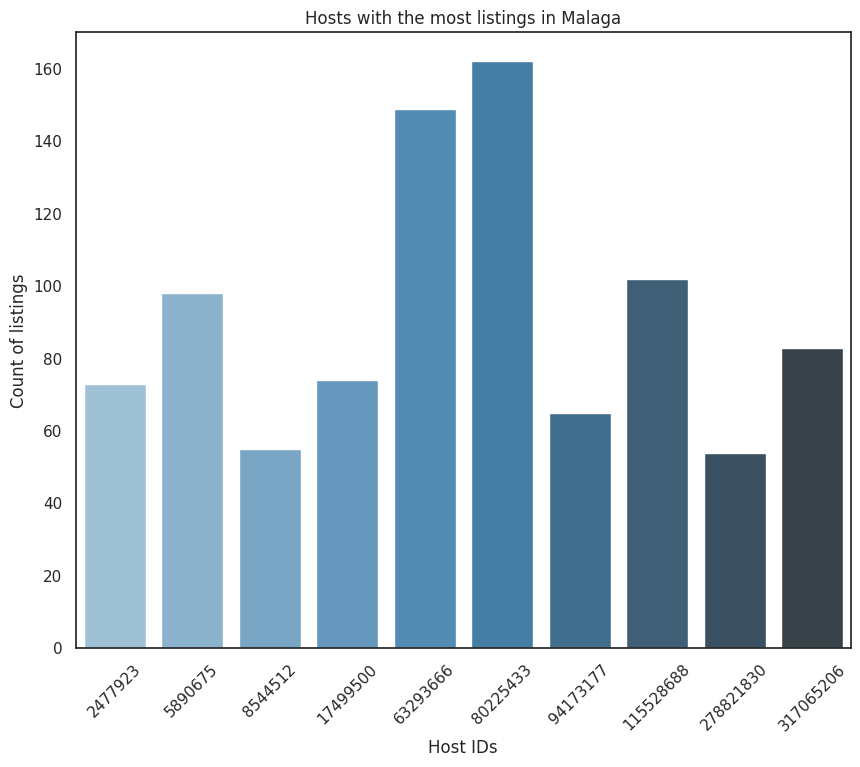

In [24]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Malaga')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Now let us find more about the unique neighbourhoods.

In [25]:

#Looking for frequency of each neighbourhood
for neighbour in airbnb.neighbourhood.unique():
    print(airbnb.neighbourhood.value_counts()[neighbour], neighbour)


919 Este
4644 Centro
104 Teatinos-Universidad
1262 Churriana
621 Carretera de Cadiz
550 Cruz De Humilladero
53 Palma-Palmilla
31 Puerto de la Torre
61 Ciudad Jardin
164 Bailen-Miraflores
72 Campanillas


From this, we can see that the $5$ most popular neighbourhoods for Malaga Airbnb are:
> - Centro <br>
> - Este <br>
> - Churriana <br>
> - Cruz de Humilladero <br>
> - Bailen-Miraflores <br>

So let us get some conclussions about this unique values.

In [26]:
#Centro
sub_1=airbnb.loc[airbnb['neighbourhood'] == 'Centro']
price_sub1=sub_1[['price']]
#Este
sub_2=airbnb.loc[airbnb['neighbourhood'] == 'Este']
price_sub2=sub_2[['price']]
#Churriana
sub_3=airbnb.loc[airbnb['neighbourhood'] == 'Churriana']
price_sub3=sub_3[['price']]
#Cruz de Humilladero
sub_4=airbnb.loc[airbnb['neighbourhood'] == 'Cruz De Humilladero']
price_sub4=sub_4[['price']]
#Baile-Miraflores
sub_5=airbnb.loc[airbnb['neighbourhood'] == 'Bailen-Miraflores']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [27]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Centro', 'Este', 'Churriana', 'Cruz de Humilladero', 'Baile-Miraflores']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Centro,Este,Churriana,Cruz de Humilladero,Baile-Miraflores
Stats,,,,,
min,13.0,12.0,15.0,15.0,12.00
25%,68.0,66.0,56.0,55.0,36.50
50%,93.0,94.0,81.5,65.0,60.00
75%,131.0,149.0,121.0,116.0,79.25
max,21000.0,2018.0,21000.0,1686.0,400.00


Text(0.5, 1.0, 'Density and distribution of prices for each neighborhood')

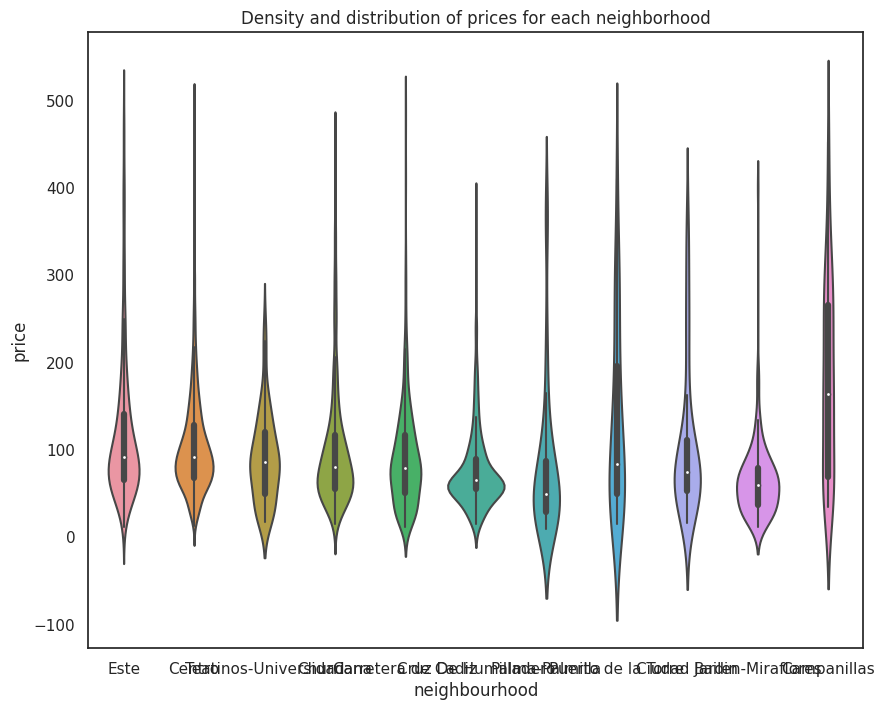

In [28]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood', y='price')
viz_2.set_title('Density and distribution of prices for each neighborhood')

Now let us check some other columns.

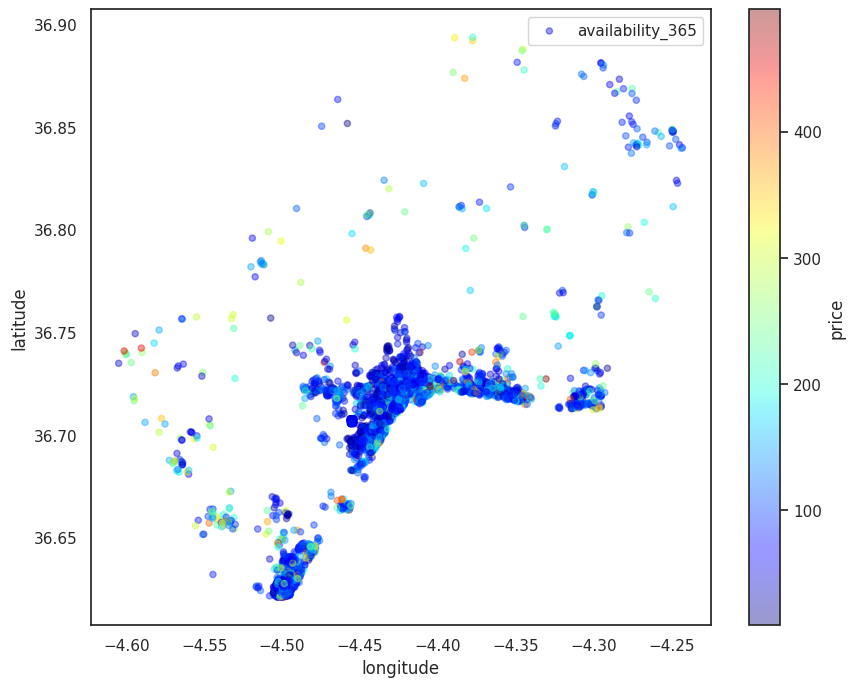

In [29]:
#let's what we can do with our given longtitude and latitude columns
import matplotlib.pyplot as plt
#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

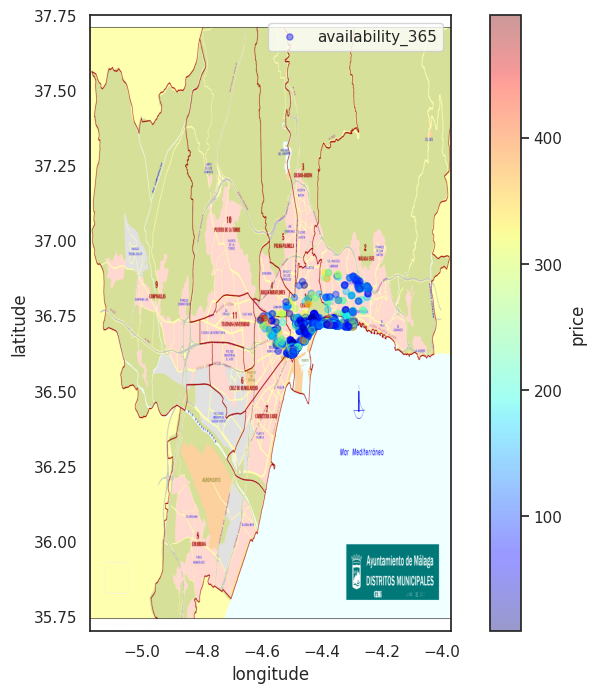

In [131]:

#Initializing the figure size
plt.figure(figsize=(10,8))
nga_img=plt.imread("Malaga-map.png")
#Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nga_img,zorder=0,extent=[-5.17, -3.97, 35.7,37.75])
ax=plt.gca()
#Using scatterplot again to showcase the price distribution
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

After scalling our image the best way we can see that the most popular room type is the entire home/apt, followed by a pricing visualization.

In [168]:
#Let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#Initializing empty list where we are going to put our name strings
_names_=[]
#Getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#Setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#Initializing empty list where we are going to have words counted
_names_for_count_=[]
#Getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [169]:
#We are going to use counter
from collections import Counter
#Let us see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [170]:
#Put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

Now we will use bar plots to visualize the data.

[Text(0, 0, 'apartment'),
 Text(1, 0, 'apartamento'),
 Text(2, 0, 'de'),
 Text(3, 0, 'en'),
 Text(4, 0, 'in'),
 Text(5, 0, 'malaga'),
 Text(6, 0, 'centro'),
 Text(7, 0, 'málaga'),
 Text(8, 0, '-'),
 Text(9, 0, 'la'),
 Text(10, 0, 'center'),
 Text(11, 0, 'the'),
 Text(12, 0, 'with'),
 Text(13, 0, 'con'),
 Text(14, 0, 'studio'),
 Text(15, 0, 'beach'),
 Text(16, 0, 'y'),
 Text(17, 0, 'playa'),
 Text(18, 0, 'habitación'),
 Text(19, 0, 'city'),
 Text(20, 0, 'el'),
 Text(21, 0, '2'),
 Text(22, 0, 'a'),
 Text(23, 0, '&'),
 Text(24, 0, 'del')]

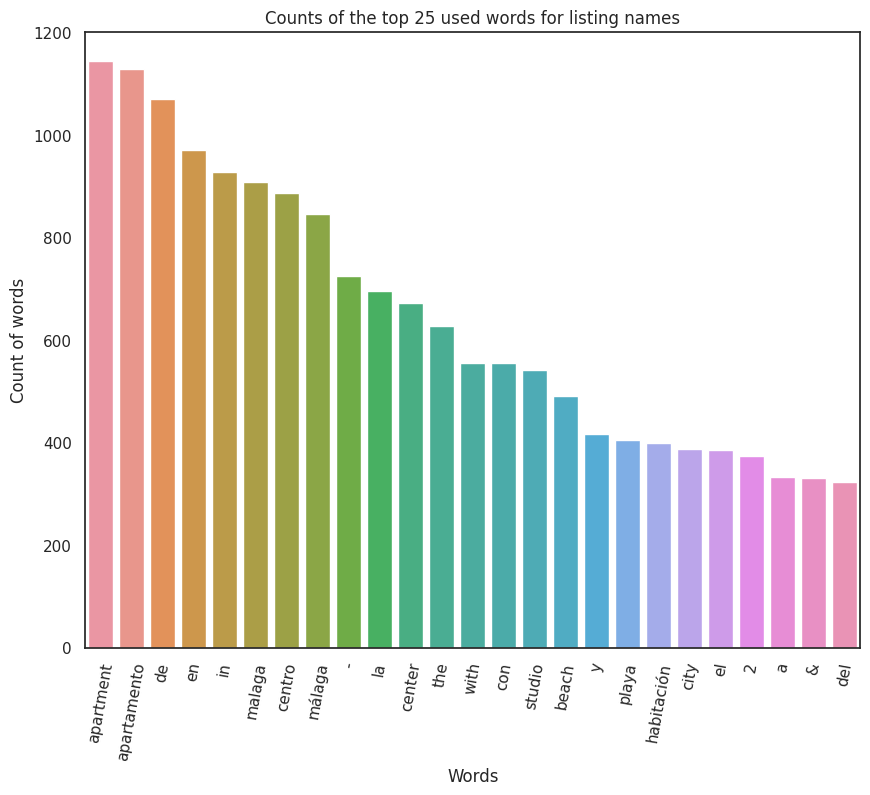

In [171]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

Now we could remove the stopwords in Spanish to get a list of most advertised words.

We can also study the reviews.

In [172]:
#Last column we need to look at is 'number_of_reviews'

#Let's grab 10 most reviewed listings in Malaga
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
455,Room next to Airport A/C,47971136,NaN,Cruz De Humilladero,36.70470,-4.45034,Private room,27,1,741,9.17,11,340,69,VFT/MA/23507
103,Nice Flat in the center VFT/MA/00202,11931754,NaN,Centro,36.72464,-4.41773,Entire home/apt,46,2,720,6.94,2,183,81,VFT/MA/00202
102,Lovely apartment in the center VFT/MA/00204,11931754,NaN,Centro,36.72634,-4.41818,Entire home/apt,61,2,627,6.03,2,273,66,VFT/MA/00204
2071,Apartamento Centro Málaga+Garaje Privado Gratis,226466430,NaN,Centro,36.72230,-4.42716,Entire home/apt,79,1,586,12.87,3,332,183,CTC-2018210640
957,PICASSO HOME,127195773,NaN,Centro,36.72677,-4.41933,Entire home/apt,65,1,506,7.68,2,249,60,VFT/MA/10870
333,1 Acogedora hab. cerca de la playa,36462988,NaN,Carretera de Cadiz,36.70115,-4.44342,Private room,26,1,501,5.69,2,171,80,CTC-2016102737
1264,CITY HOME,127195773,NaN,Bailen-Miraflores,36.72394,-4.43297,Entire home/apt,58,1,484,8.07,2,278,61,VFT/MA/14174
372,"""PICASSO ROOM"" Cozy+Minimalism+Beach+Station",44170578,NaN,Carretera de Cadiz,36.71056,-4.42991,Private room,26,3,476,5.62,5,28,36,VFT/MA/06981
1330,Malaga City Breaks - Superior Apartment,122669535,NaN,Centro,36.72306,-4.42382,Entire home/apt,117,1,475,8.20,8,358,1,VFT/MA/15654
294,Lovely Flat at the Historic Center,32285652,NaN,Centro,36.72167,-4.42002,Entire home/apt,100,2,471,5.32,1,107,76,VFT/MA/0293


In [173]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 60.5


So this is a little Project to improve my skills in Data Science and Data Analysis, I hope you enjoyed it and if you have any suggestions or comments please let me know.

#### *This was collected and solved by jdpalmad and the datasets can be found at InsideAirbnb Website*